In [36]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [5]:
forest= pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**<h3>EDA</h3>**

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [16]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
forest.isnull().sum().any()

False

<Axes: >

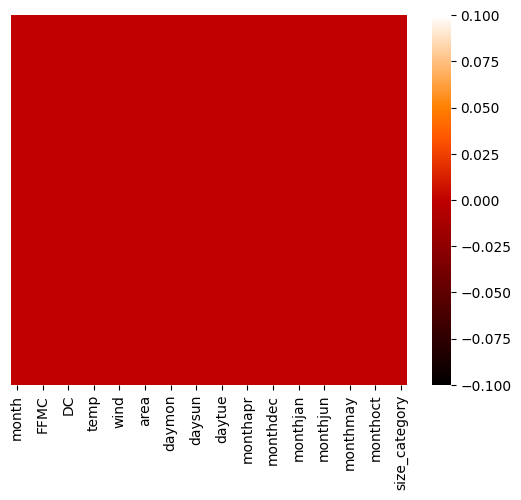

In [9]:
sns.heatmap(forest.isna(), cmap =('gist_heat'), yticklabels=False)

In [10]:
forest.duplicated().sum()

8

In [17]:
forest= forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],
                 axis = 1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [18]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


In [19]:
encoding=preprocessing.LabelEncoder()
forest['month']=encoding.fit_transform(forest['month'])
forest['day']=encoding.fit_transform(forest['day'])
forest['size_category']=encoding.fit_transform(forest['size_category'])

In [20]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


<Figure size 2000x2000 with 0 Axes>

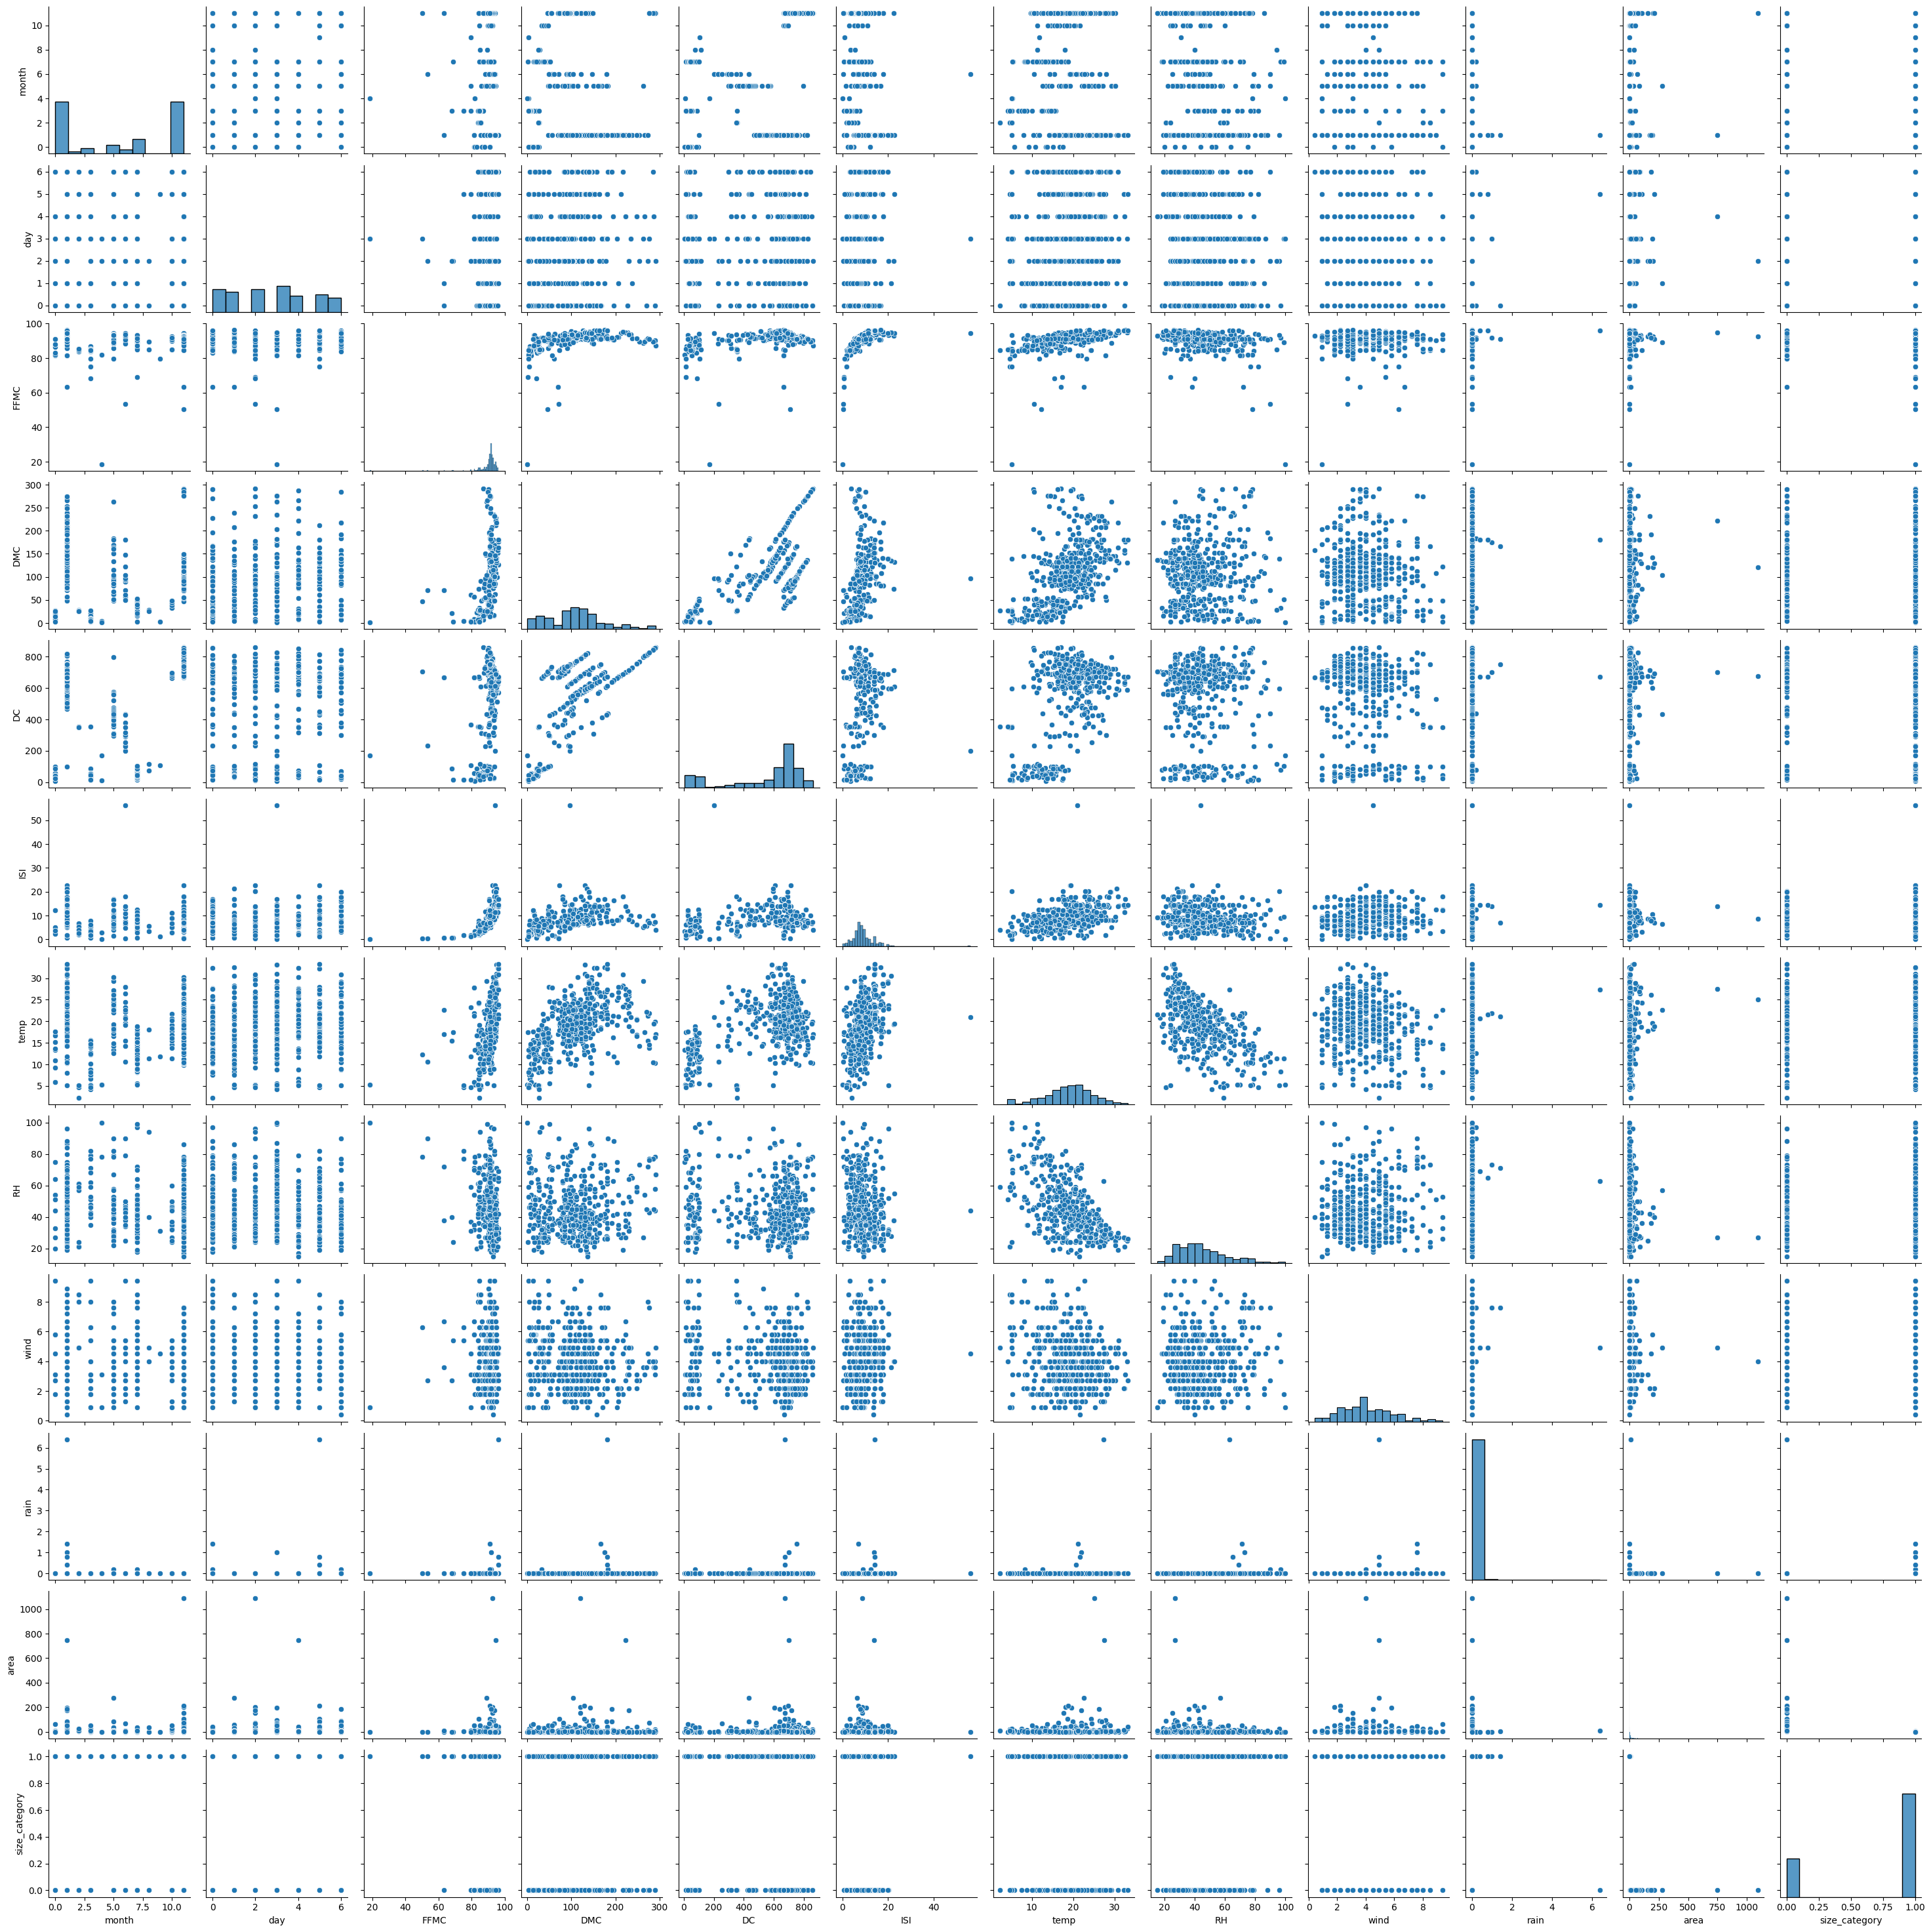

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(forest)
plt.show()

**<h3>Data Visualize</h3>**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'day'),
  Text(2.5, 0, 'FFMC'),
  Text(3.5, 0, 'DMC'),
  Text(4.5, 0, 'DC'),
  Text(5.5, 0, 'ISI'),
  Text(6.5, 0, 'temp'),
  Text(7.5, 0, 'RH'),
  Text(8.5, 0, 'wind'),
  Text(9.5, 0, 'rain'),
  Text(10.5, 0, 'area')])

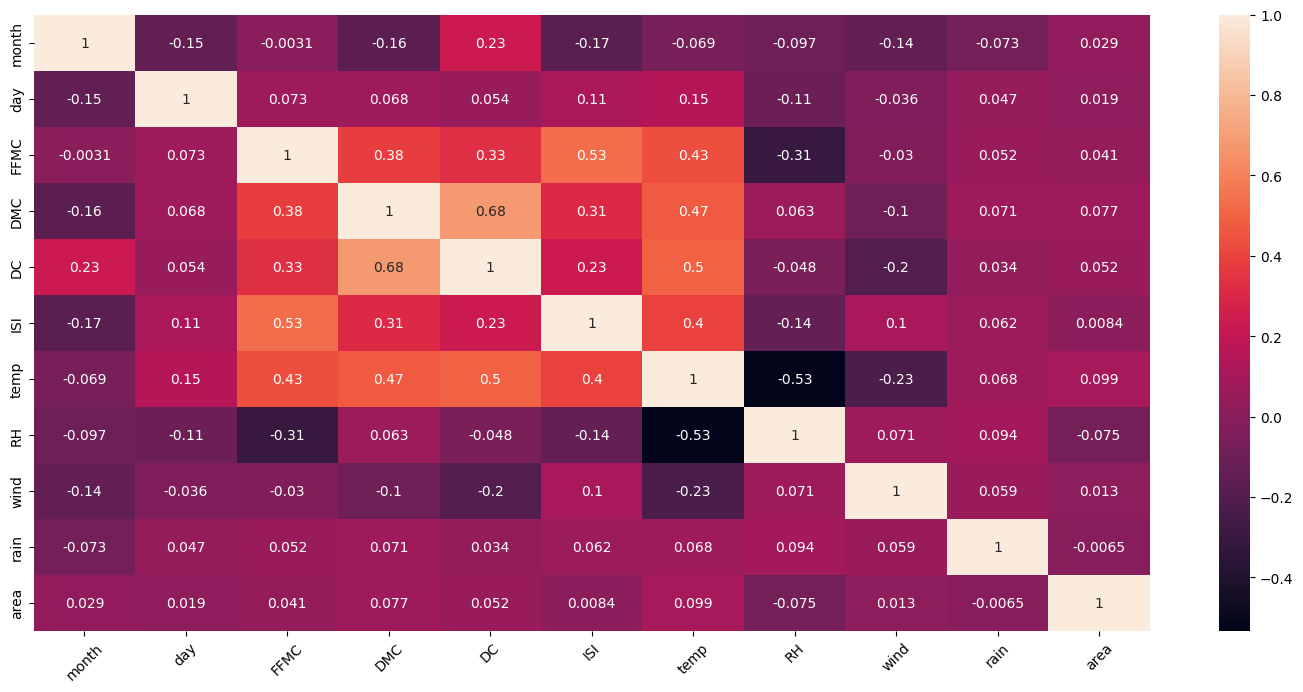

In [24]:
# Xvalues Correleation heatmap
forest1= forest.iloc[:,:11]
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forest1.corr(), annot=True);
plt.xticks(rotation=45)

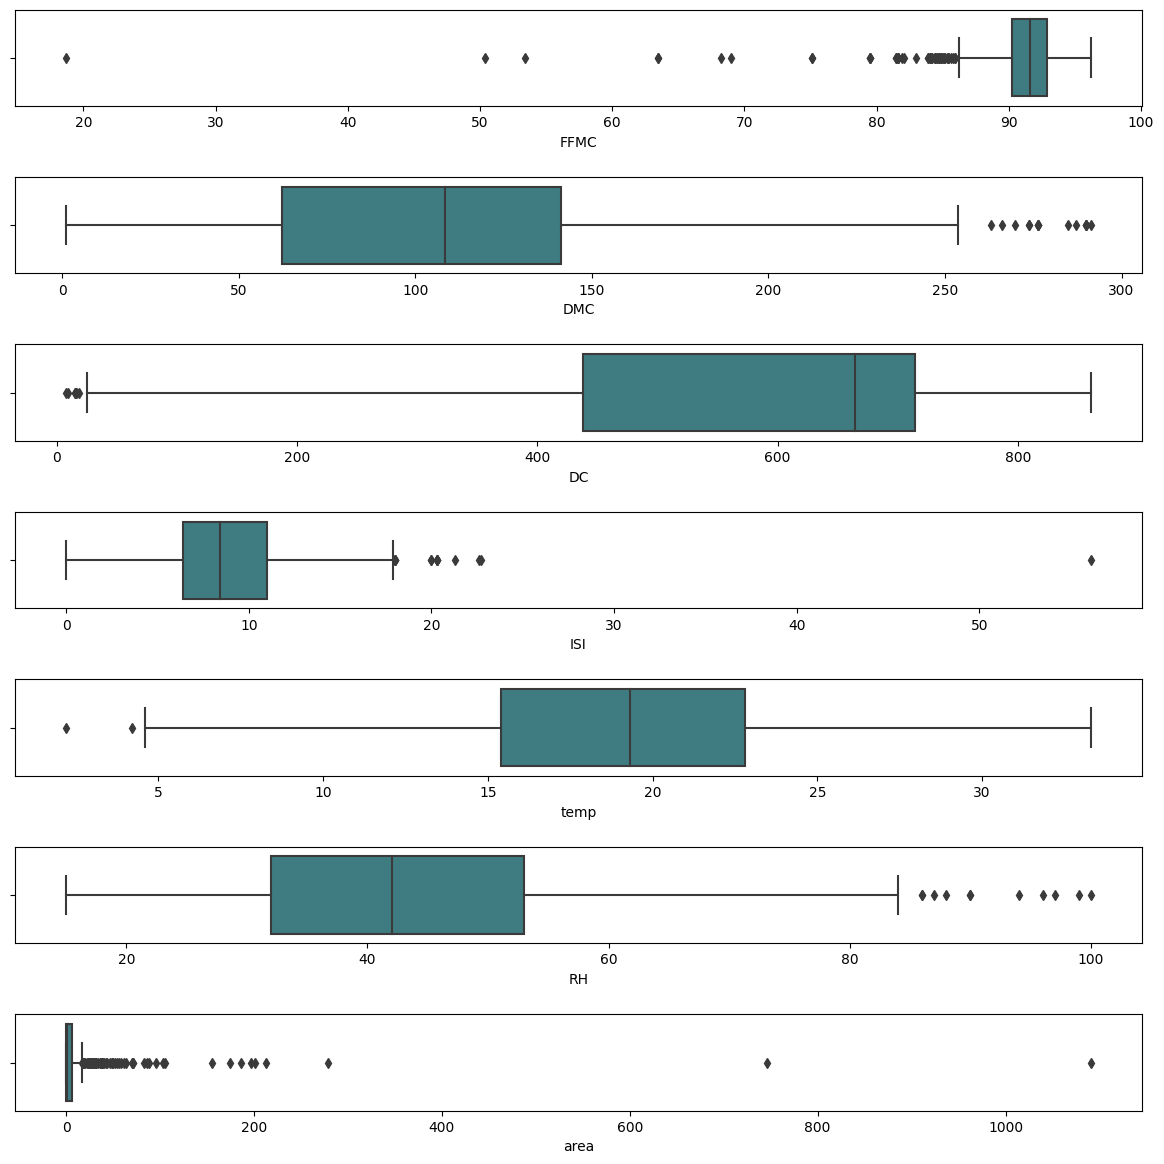

In [26]:
fig, axes=plt.subplots(7,1,figsize=(12,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=forest,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=forest,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=forest,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=forest,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=forest,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=forest,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=forest,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are numerous outliers in the dataframe, but we cannot remove them because they are there in big numbers and might be useful for developing the model.

In [27]:
YY = forest[('size_category')]

1    371
0    138
Name: size_category, dtype: int64

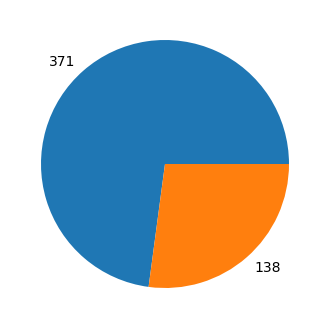

In [28]:
plt.figure(figsize=(4,8))
plt.pie(YY.value_counts(), labels=YY.value_counts())
YY.value_counts()

In [29]:
month_df = forest.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head()

,size_category,month,count
11,1,1,135
21,1,11,121
9,0,11,51
1,0,1,43
17,1,7,42


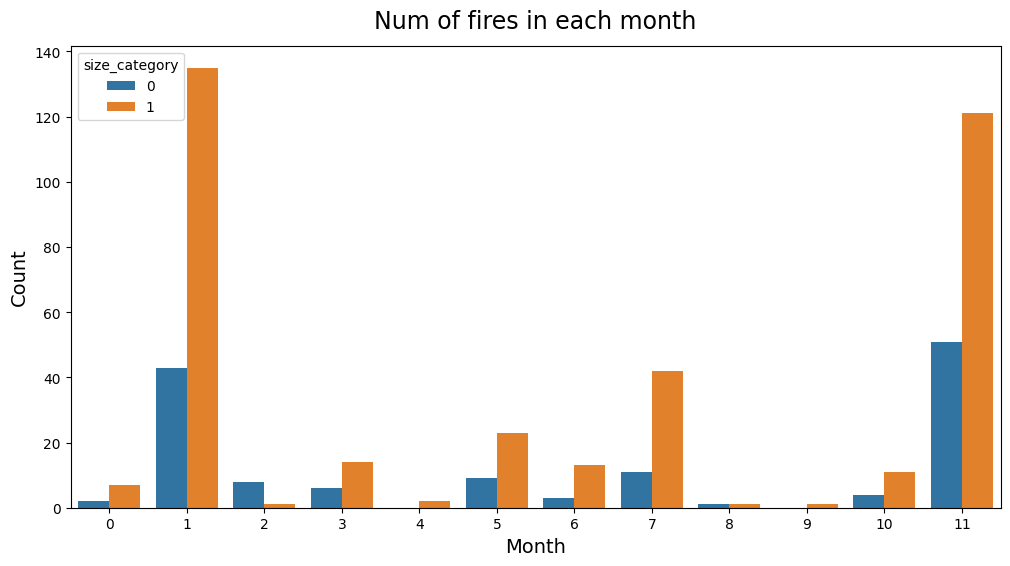

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**<h3>Data Pre-Processing</h3>**

In [31]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,11]

In [32]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [35]:
print("Shape :")
print("x_train = ", x_train.shape,
"y_train = ", y_train.shape,
"x_test = ", x_test.shape,
"y_test = ", y_test.shape)

Shape :
x_train =  (356, 11) y_train =  (356,) x_test =  (153, 11) y_test =  (153,)


# **SVM Model**

**<h3>Hypertunning of Parameter</h3>**

In [37]:
# Create the model
model = SVC()

# Define the grid search parameters
param_grid= [{'kernel':['linear','poly','rbf', 'sigmoid'],
                     'gamma': [0.1,0.01,1,2],
                     'degree': [0, 1, 2, 3, 4, 5, 6],
                     'C': [0.4,0.45,0.5,0.55,0.6],
                    }]

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result= grid.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5; 61/560] START C=0.4, degree=3, gamma=2, kernel=linear..................
[CV 1/5; 61/560] END C=0.4, degree=3, gamma=2, kernel=linear;, score=0.931 total time=   0.1s
[CV 2/5; 61/560] START C=0.4, degree=3, gamma=2, kernel=linear..................
[CV 2/5; 61/560] END C=0.4, degree=3, gamma=2, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5; 61/560] START C=0.4, degree=3, gamma=2, kernel=linear..................
[CV 3/5; 61/560] END C=0.4, degree=3, gamma=2, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/5; 61/560] START C=0.4, degree=3, gamma=2, kernel=linear..................
[CV 4/5; 61/560] END C=0.4, degree=3, gamma=2, kernel=linear;, score=1.000 total time=   0.1s
[CV 5/5; 61/560] START C=0.4, degree=3, gamma=2, kernel=linear..................
[CV 5/5; 61/560] END C=0.4, degree=3, gamma=2, kernel=linear;, score=0.986 total time=   0.1s
[CV 1/5; 62/560] START C=0.4, degree=3, gamma=2, kernel=poly..............

In [38]:
# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980438 using {'C': 0.4, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.974844 (0.023868) with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'linear'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'poly'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.974844 (0.023868) with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'linear'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'poly'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'rbf'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.974844 (0.023868) with: {'C': 0.4, 'degree': 0, 'gamma': 1, 'kernel': 'linear'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 1, 'kernel': 'poly'}
0.730243 (0.028087) with: {'C': 0.4, 'degree': 0, 'gamma': 1, 'kernel': 'rbf'}
0.730243 (0.0

**Best:** 0.980438 using {'C': 0.4, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}

**<h3>Model Building</h3>**

In [39]:
Tunned_model = SVC(kernel = "poly",random_state=42,gamma=0.01,C=0.4, degree=1)
Tunned_model.fit(x_train,y_train)

SVC(C=0.4, degree=1, gamma=0.01, kernel='poly', random_state=42)

In [41]:
pred_test = Tunned_model.predict(x_test)
pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [42]:
accuracy_score(y_test,pred_test)

0.9673202614379085

In [43]:
confusion_matrix (y_test,pred_test)

array([[ 39,   3],
       [  2, 109]])

In [44]:
classification_report(y_test,pred_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.97      0.98      0.98       111

    accuracy                           0.97       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.97      0.97      0.97       153



(array([[ 41.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.],
        [ 42.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 111.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

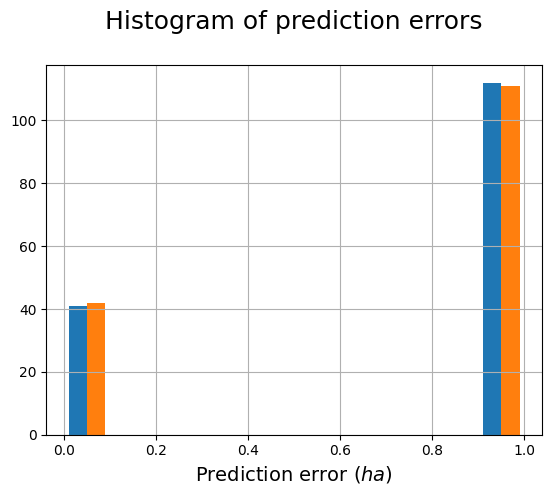

In [45]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist((pred_test ,y_test),bins=10)